In [7]:
import pickle
import itertools
import open3d as o3d
import numpy as np
from scipy import interpolate
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

In [8]:
%matplotlib inline

In [12]:
with open("../known_opt_curve_fragment/marged_cfs.pickle", "rb") as pickle_file:
    s_curve_list = pickle.load(pickle_file)

In [13]:
def rotation_mat(angle):
    Rx = np.array([[1,0,0],
                 [0, np.cos(angle[0]), -np.sin(angle[0])],
                 [0, np.sin(angle[0]), np.cos(angle[0])]])

    Ry = np.array([[np.cos(angle[1]), 0, np.sin(angle[1])],
                 [0,1,0],
                 [-np.sin(angle[1]), 0, np.cos(angle[1])]])

    Rz = np.array([[np.cos(angle[2]), -np.sin(angle[2]), 0],
                 [np.sin(angle[2]), np.cos(angle[2]), 0],
                 [0,0,1]])
    return Rz@Rx@Ry
angle = [-np.pi/2, np.pi/2, np.pi/2]
R = rotation_mat(angle)
R_mirror = np.array([[-1,0,0],
                    [0,1,0],
                    [0,0,1]])

In [14]:
"""fig = plt.figure(figsize = (12, 12))
fig.patch.set_alpha(0.)
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel("x", size = 14)
ax.set_ylabel("z", size = 14)
ax.set_zlabel("y", size = 14)
ax.set_box_aspect((1,1,1))
ax.view_init(elev=30, azim=-70)

ax.axis("off")
"""


'fig = plt.figure(figsize = (12, 12))\nfig.patch.set_alpha(0.)\nax = fig.add_subplot(111, projection=\'3d\')\n\nax.set_xlabel("x", size = 14)\nax.set_ylabel("z", size = 14)\nax.set_zlabel("y", size = 14)\nax.set_box_aspect((1,1,1))\nax.view_init(elev=30, azim=-70)\n\nax.axis("off")\n'

<IPython.core.display.Javascript object>


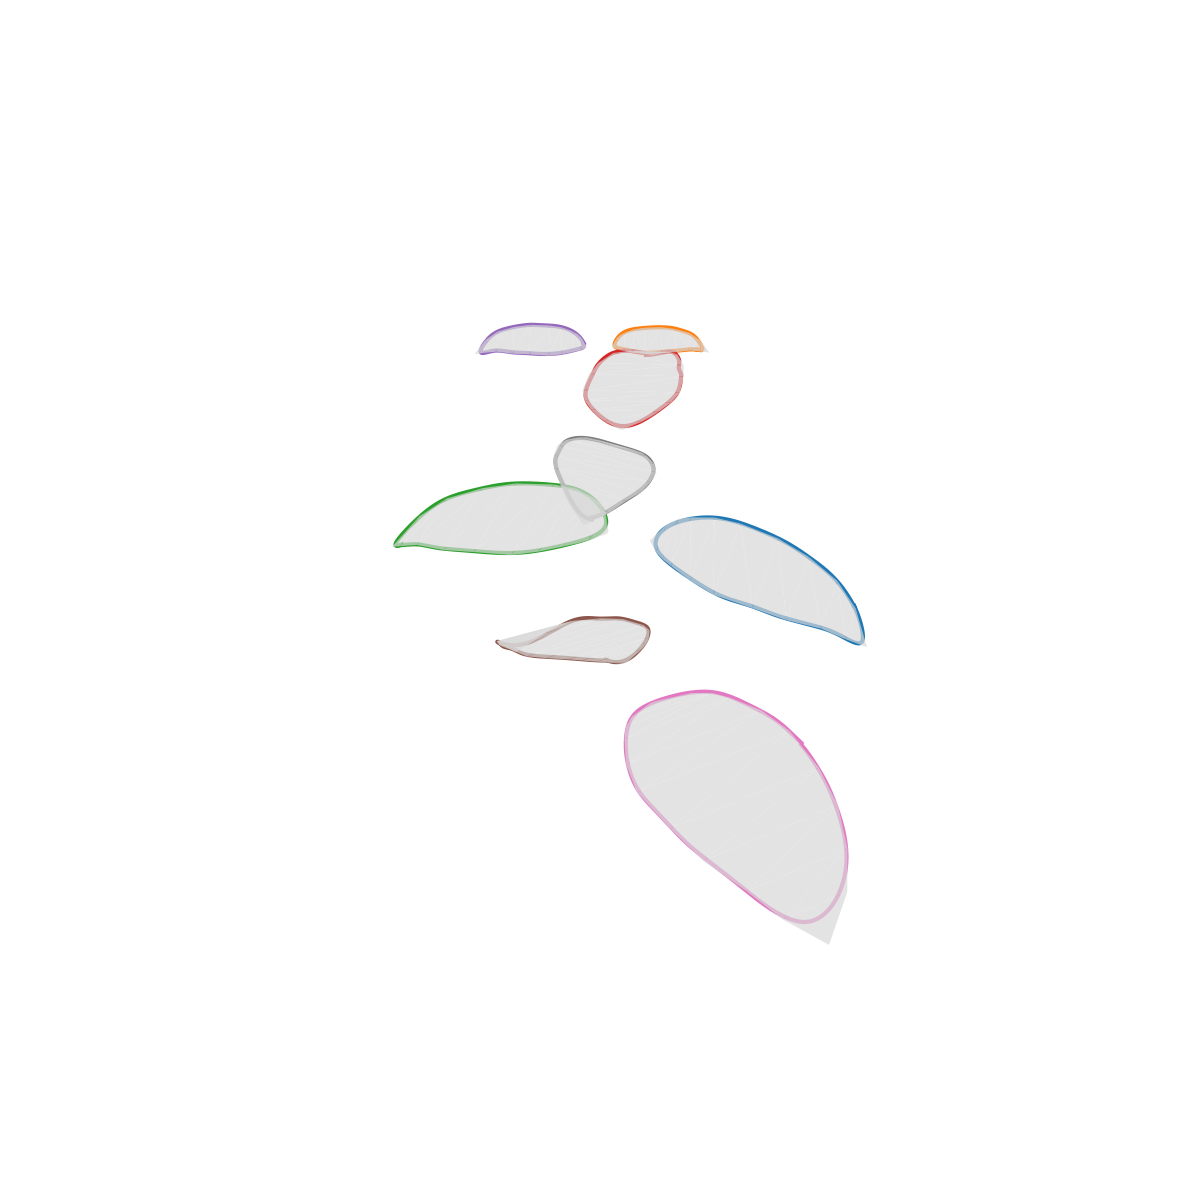

In [16]:
%matplotlib notebook
fig = plt.figure(figsize = (12, 12))
fig.patch.set_alpha(0.)
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel("x", size = 14)
ax.set_ylabel("z", size = 14)
ax.set_zlabel("y", size = 14)
ax.set_box_aspect((1,1,1))
ax.view_init(elev=30, azim=-90)

ax.axis("off")

for i in range(8):
    mesh = o3d.io.read_triangle_mesh("polygon/quan_e_a/q_1_a.ply")
    mesh.triangles = o3d.utility.Vector3iVector(np.asarray(mesh.triangles)[np.asarray(mesh.cluster_connected_triangles()[0])==i])# i
    #mesh.vertices = o3d.utility.Vector3iVector(ver)
    ver = np.asarray(mesh.vertices)[np.unique(np.asarray(mesh.triangles))]
    x, y, z = ver[:,0], ver[:,1], ver[:,2]
    ax.plot_trisurf(x, y, z, shade=False, alpha=0.7, color="#D8D8D8")#color="#1AFF1A")
    pcd = o3d.geometry.PointCloud()
    pcd.points = o3d.utility.Vector3dVector(s_curve_list[i])
    pcd.rotate(np.linalg.inv(R),(0,0,0))
    pcd.rotate(R_mirror,(0,0,0))
    pcd.scale(10,(0,0,0))
    s_c = np.array(pcd.points)
    x_q, y_q, z_q = s_c[:,0], s_c[:,1], s_c[:,2]
    ax.plot(x_q, y_q, z_q,"-",lw=3)#,color="#920092")
#plot_graph()



plt.show()

<IPython.core.display.Javascript object>


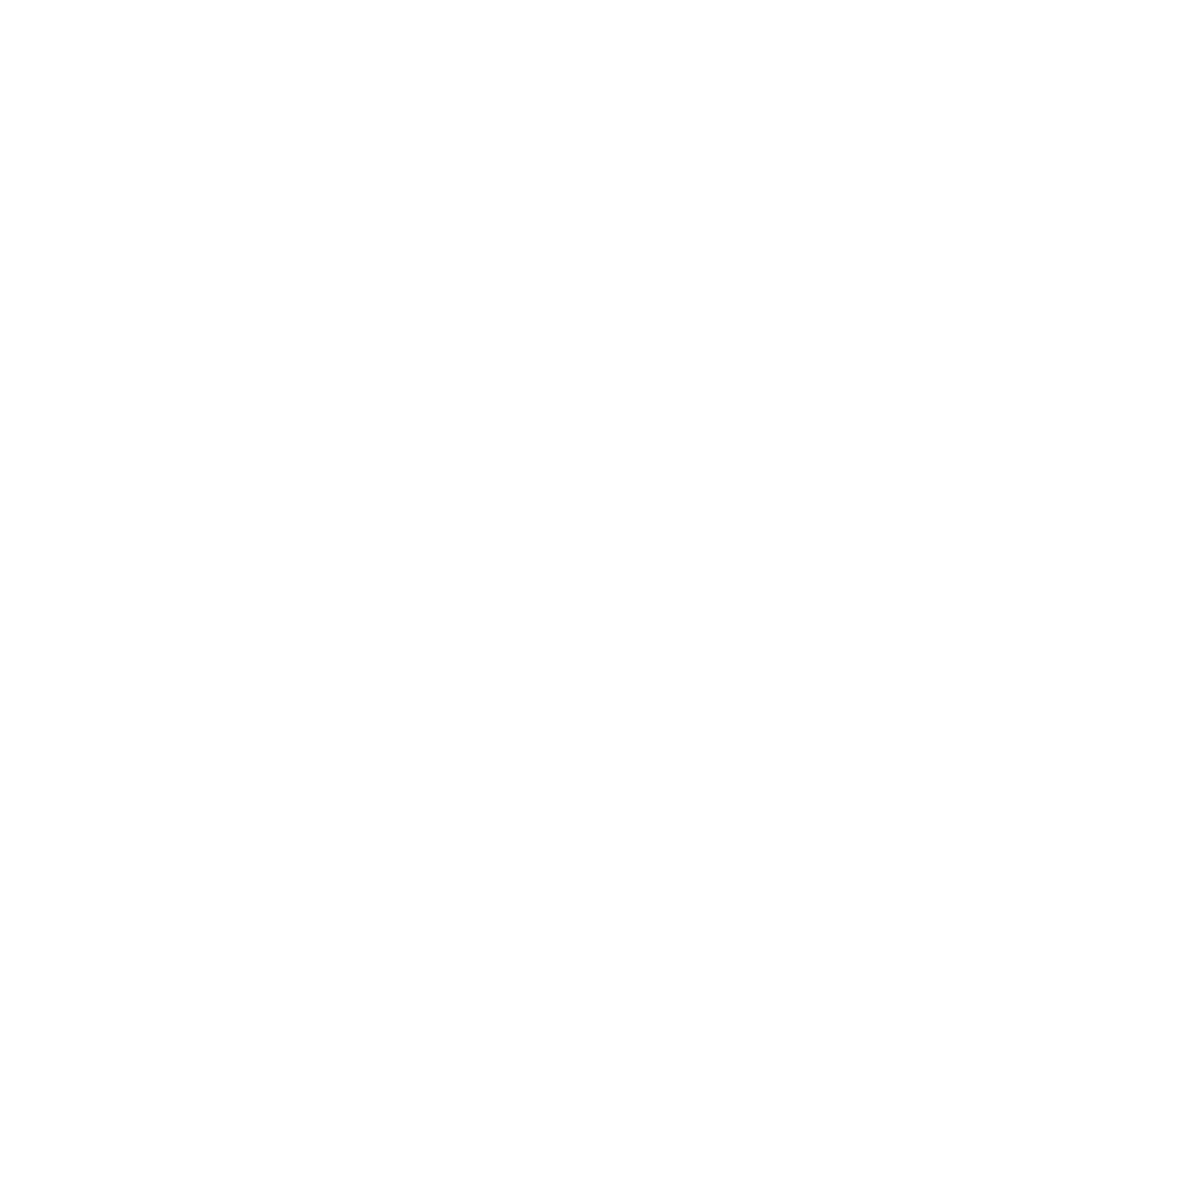

[Open3D WARNING] Read PLY failed: unable to open file: polygon/quan/q_1.ply


IndexError: list index out of range

In [111]:
fig = plt.figure(figsize = (12, 12))
fig.patch.set_alpha(0.)
### 3DAxesを追加
ax = fig.add_subplot(111, projection='3d')

### 軸ラベルを設定
ax.set_xlabel("x", size = 14)
ax.set_ylabel("z", size = 14)
ax.set_zlabel("y", size = 14)
ax.set_box_aspect((1,1,1))
ax.axis("off")

def plot_graph():
    for i in range(8):
        mesh = o3d.io.read_triangle_mesh("polygon/quan/q_1.ply")
        mesh.triangles = o3d.utility.Vector3iVector(np.asarray(mesh.triangles)[np.asarray(mesh.cluster_connected_triangles()[0])==i])
        ver = np.asarray(mesh.vertices)[np.unique(np.asarray(mesh.triangles))]
        x, y, z = ver[:,0], ver[:,1], ver[:,2]
        ax.plot_trisurf(x, y, z, color="#CCCCCC", shade=False, alpha=0.4)
        pcd = o3d.geometry.PointCloud()
        pcd.points = o3d.utility.Vector3dVector(s_curve_list[i])
        pcd.rotate(np.linalg.inv(R),(0,0,0))
        pcd.scale(10,(0,0,0))
        s_c = np.array(pcd.points)
        x_q, y_q, z_q = s_c[:,0], s_c[:,1], s_c[:,2]
        ax.plot(x_q, y_q, z_q,"-")

def plt_graph3d(angle):
    ax.view_init(azim=angle*5)
    
### アニメーションを作成
ani = FuncAnimation(
    fig,
    func=plt_graph3d,
    frames=72,
    init_func=plot_graph,
    interval=200
)

### imagemagickで作成したアニメーションをGIFで書き出す
ani.save("rolling.gif", writer="pillow", savefig_kwargs={'transparent': True, 'facecolor': 'none'})